Import and inspect the dataset for structure

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# initial exploration of dataset

In [ ]:
# names of tables
dfs = [file for file in os.listdir('/content/drive/MyDrive/🛒 Online Shop 2024 dataset') if file.endswith('.csv')]
print(dfs)

['payment.csv', 'suppliers.csv', 'order_items.csv', 'shipments.csv', 'reviews.csv', 'products.csv', 'customers.csv', 'orders.csv', 'clustered_df.csv']


In [ ]:
# previews of tables
for file in dfs:
  df = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/' + file)
  print(file)
  print(df.head())
  print(df.info())
  print(df.describe())
  print('\n')

payment.csv
   payment_id  order_id payment_method  amount transaction_status
0           1         1    Credit Card  232.15          Completed
1           2         2    Credit Card  454.44          Completed
2           3         3    Credit Card   26.14          Completed
3           4         4    Credit Card  985.70          Completed
4           5         5    Credit Card  733.32          Completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   payment_id          15000 non-null  int64  
 1   order_id            15000 non-null  int64  
 2   payment_method      15000 non-null  object 
 3   amount              15000 non-null  float64
 4   transaction_status  15000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 586.1+ KB
None
         payment_id      order_id        amount
count  15000.000000  150

In [ ]:
customers_df = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/customers.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/orders.csv')
products_df = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/products.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/reviews.csv')
shipping_df = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/shipments.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/order_items.csv')
suppliers_df = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/suppliers.csv')
payments_df = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/payment.csv')

# Clean the dataset to handle missing values and duplicates

In [ ]:
# checking for nulls and duplicates
for file in dfs:
  df = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/' + file)
  print(file)
  print('duplicates: ', df.duplicated().sum())
  print('null values: ', df.isna().sum())

payment.csv
duplicates:  0
null values:  payment_id            0
order_id              0
payment_method        0
amount                0
transaction_status    0
dtype: int64
suppliers.csv
duplicates:  0
null values:  supplier_id      0
supplier_name    0
contact_name     0
address          0
phone_number     0
email            0
dtype: int64
order_items.csv
duplicates:  0
null values:  order_item_id        0
order_id             0
product_id           0
quantity             0
price_at_purchase    0
dtype: int64
shipments.csv
duplicates:  0
null values:  shipment_id        0
order_id           0
shipment_date      0
carrier            0
tracking_number    0
delivery_date      0
shipment_status    0
dtype: int64
reviews.csv
duplicates:  0
null values:  review_id      0
product_id     0
customer_id    0
rating         0
review_text    0
review_date    0
dtype: int64
products.csv
duplicates:  0
null values:  product_id      0
product_name    0
category        0
price           0
supplier_i

# exploratory data analysis:

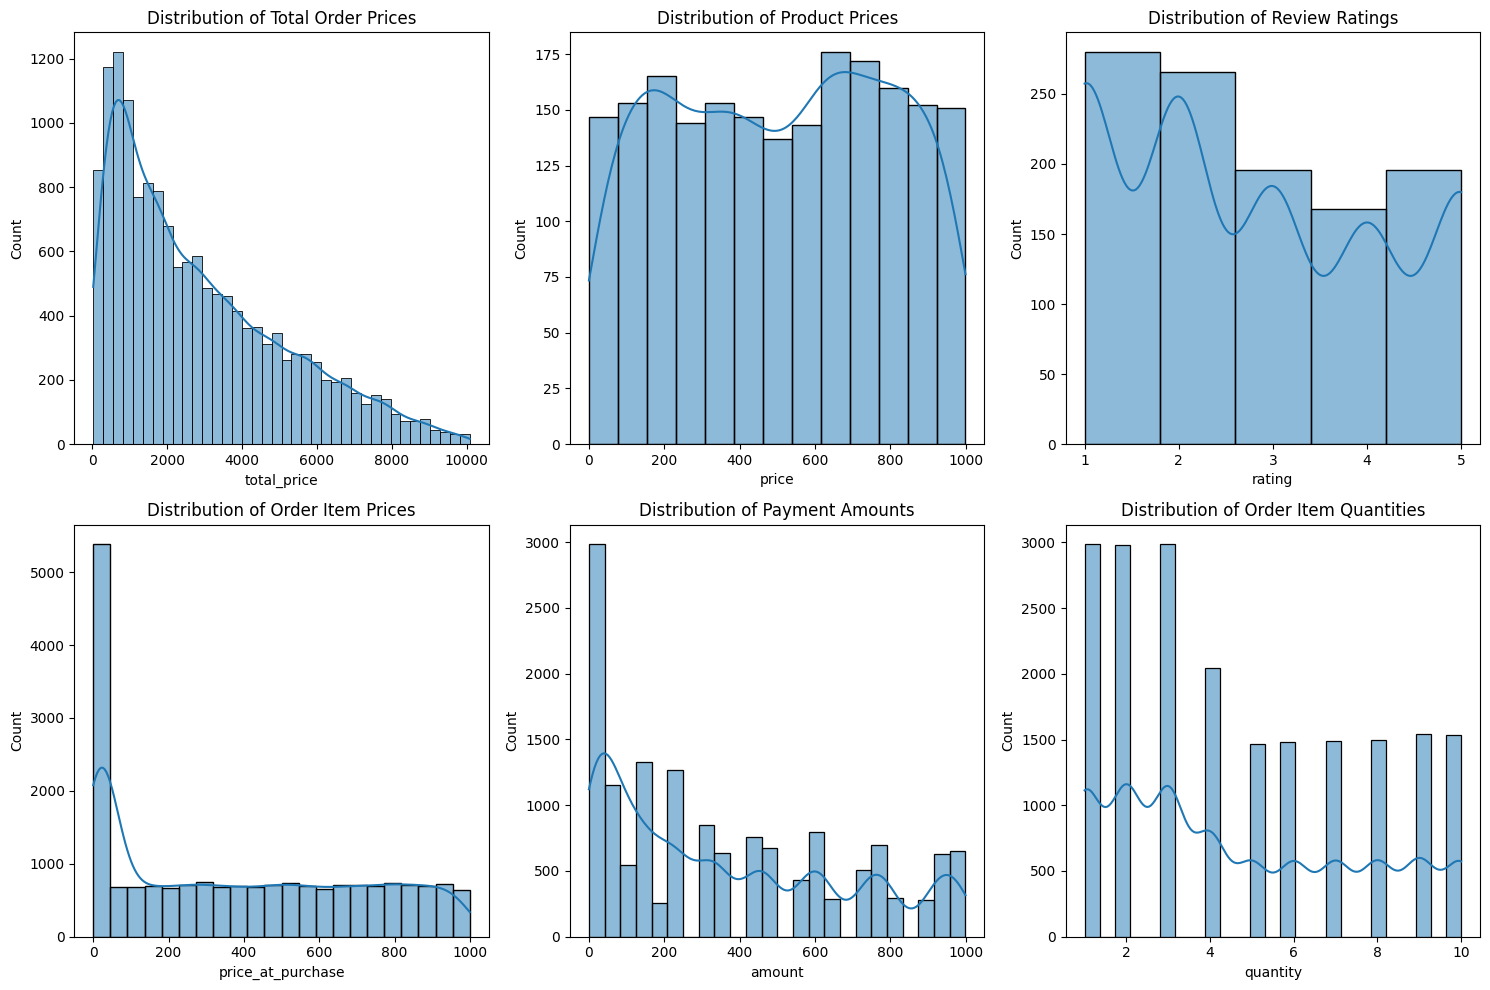

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
sns.histplot(orders_df['total_price'], kde=True)
plt.title('Distribution of Total Order Prices')

plt.subplot(2,3,2)
sns.histplot(products_df['price'], kde=True)
plt.title('Distribution of Product Prices')

plt.subplot(2,3,3)
sns.histplot(reviews_df['rating'], bins = 5, kde=True)
plt.xticks(np.arange(1, 6))
plt.title('Distribution of Review Ratings')

plt.subplot(2,3,4)
sns.histplot(order_items_df['price_at_purchase'], kde=True)
plt.title('Distribution of Order Item Prices')

plt.subplot(2,3,5)
sns.histplot(payments_df['amount'], kde=True)
plt.title('Distribution of Payment Amounts')

plt.subplot(2,3,6)
sns.histplot(order_items_df['quantity'], kde=True)
plt.title('Distribution of Order Item Quantities')

plt.tight_layout()
plt.show()

calculating % of changing for price at purchase

       product_id   price  price_at_purchase    discount
0            1032  680.43             342.92   49.602457
1            1695  940.82             955.86   -1.598605
2            1962  542.94             909.45  -67.504697
3            1958  180.06             984.91 -446.989892
4            1880  856.78             649.18   24.230257
...           ...     ...                ...         ...
19995        1871  181.38              33.18   81.706914
19996        1738   18.98              33.18  -74.815595
19997        1796  696.05              33.19   95.231664
19998         867  905.75              33.20   96.334529
19999         558  189.47              33.20   82.477437

[20000 rows x 4 columns]


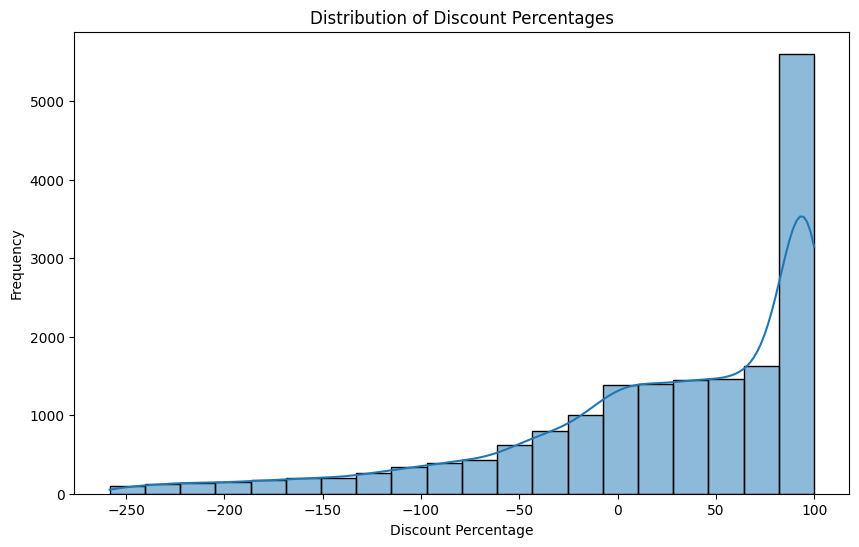

In [ ]:
merged_discount_df = pd.merge(order_items_df, products_df, left_on='product_id', right_on='product_id', how='inner')

merged_discount_df['discount'] = (merged_discount_df['price'] - merged_discount_df['price_at_purchase']) / merged_discount_df['price'] * 100
print(merged_discount_df[['product_id', 'price', 'price_at_purchase', 'discount']])

# using iqr to handle outliers
Q1 = merged_discount_df['discount'].quantile(0.25)
Q3 = merged_discount_df['discount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_discount_df = merged_discount_df[
    (merged_discount_df['discount'] >= lower_bound) &
    (merged_discount_df['discount'] <= upper_bound)
]


average change of price per product at purchase

In [ ]:
average_discount_per_product = merged_discount_df.groupby('product_id')['discount'].mean().reset_index()
average_discount_per_product.rename(columns={'discount': 'average_discount'}, inplace=True)
products_df = pd.merge(products_df, average_discount_per_product, on='product_id', how='left')
# products_df['average_discount'].fillna(0, inplace=True)
products_df.fillna({'average_discount' : 0}, inplace = True)
products_df

,product_id,product_name,category,price,supplier_id,average_discount
0,1,Office Chair,Furniture,445.01,501,68.517561
1,2,Coffee Maker,Home & Kitchen,937.29,502,45.814300
2,3,Document Scanner,Electronics,940.02,503,68.400938
3,4,Desk Mat,Accessories,76.11,504,-510.960856
4,5,Tablet Stand,Accessories,388.17,505,4.517702
...,...,...,...,...,...,...
1995,1996,4K Monitor,Electronics,175.53,596,-43.927802
1996,1997,Water Bottle,Home & Kitchen,430.14,597,-17.139270
1997,1998,File Cabinet,Furniture,53.21,598,-537.906409
1998,1999,Webcam HD,Electronics,73.49,599,-451.391607


average rating of a product

In [ ]:
average_rating_per_product = reviews_df.groupby('product_id')['rating'].mean().reset_index()
average_rating_per_product.rename(columns={'rating': 'average_rating'}, inplace=True)
products_df = pd.merge(products_df, average_rating_per_product, on='product_id', how='left')
products_df.fillna({'average_rating' : 0}, inplace = True)
products_df

,product_id,product_name,category,price,supplier_id,average_discount,average_rating
0,1,Office Chair,Furniture,445.01,501,68.517561,4.0
1,2,Coffee Maker,Home & Kitchen,937.29,502,45.814300,1.0
2,3,Document Scanner,Electronics,940.02,503,68.400938,1.0
3,4,Desk Mat,Accessories,76.11,504,-510.960856,1.0
4,5,Tablet Stand,Accessories,388.17,505,4.517702,1.0
...,...,...,...,...,...,...,...
1995,1996,4K Monitor,Electronics,175.53,596,-43.927802,0.0
1996,1997,Water Bottle,Home & Kitchen,430.14,597,-17.139270,0.0
1997,1998,File Cabinet,Furniture,53.21,598,-537.906409,0.0
1998,1999,Webcam HD,Electronics,73.49,599,-451.391607,0.0


In [ ]:
Q1 = products_df['average_discount'].quantile(0.25)
Q3 = products_df['average_discount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
products_df['average_discount_capped'] = products_df['average_discount'].apply(
    lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
)
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(products_df[['average_discount', 'average_discount_capped']].head())


Lower Bound: -211.50001045096616
Upper Bound: 205.11294000669926
   average_discount  average_discount_capped
0         68.517561                68.517561
1         45.814300                45.814300
2         68.400938                68.400938
3       -510.960856              -211.500010
4          4.517702                 4.517702


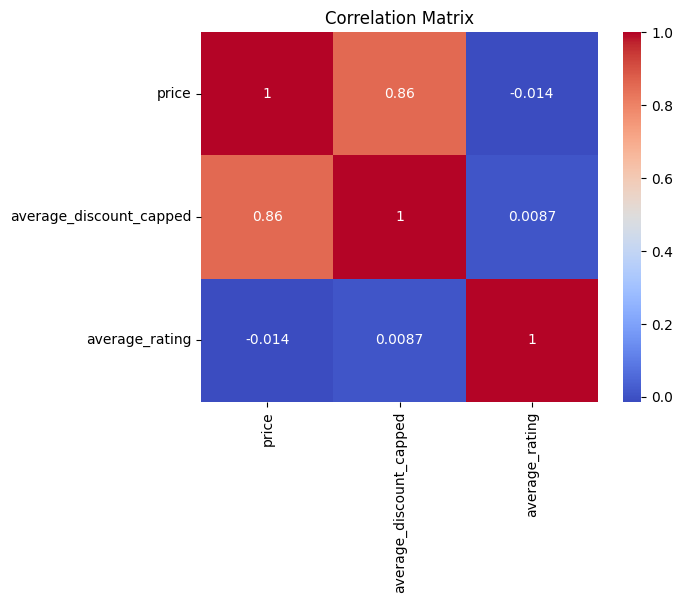

In [ ]:
corr_matrix = products_df[['price', 'average_discount_capped', 'average_rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

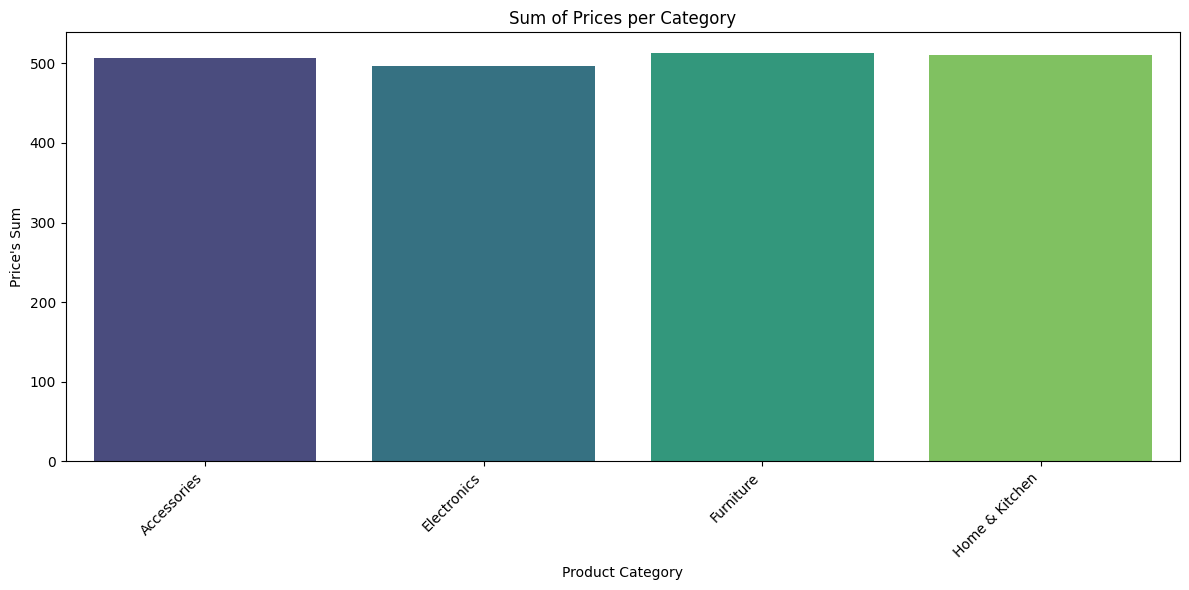

In [ ]:
average_price_per_category = products_df.groupby('category').agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='price', data=average_price_per_category,hue = 'category', legend = False, palette='viridis')
plt.title('Sum of Prices per Category')
plt.xlabel('Product Category')
plt.ylabel("Price's Sum")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

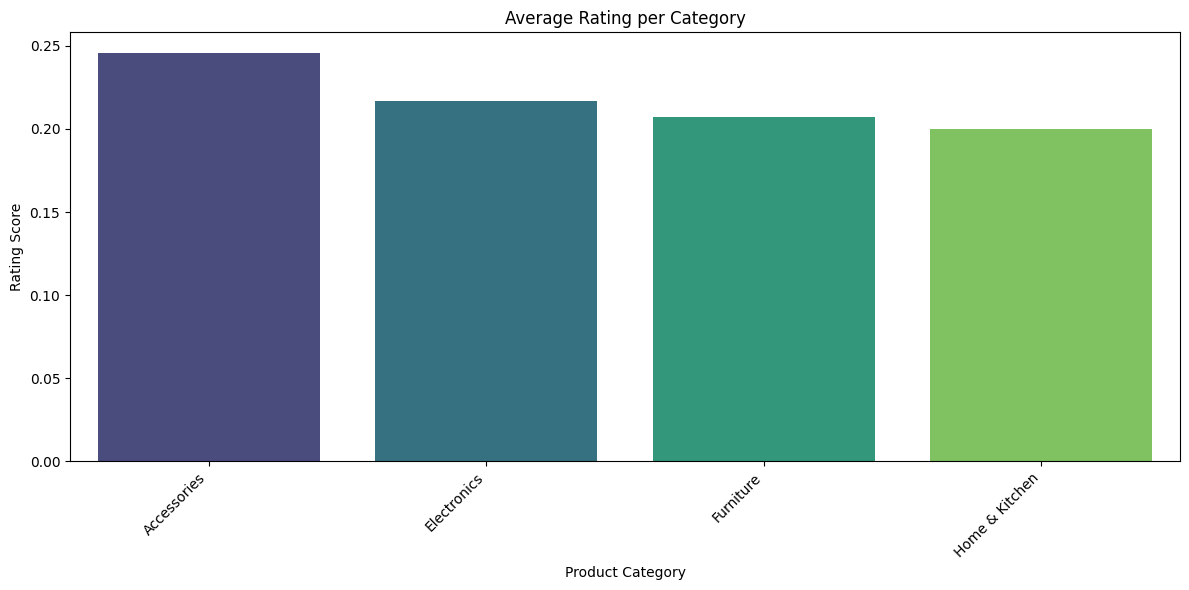

In [ ]:
average_review = products_df.groupby('category').agg({'average_rating': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='average_rating', data=average_review,hue = 'category', legend = False, palette='viridis')
plt.title('Average Rating per Category')
plt.xlabel('Product Category')
plt.ylabel("Rating Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

   year_month     revenue
0  2023-11-01  2763201.95
1  2023-12-01  3360869.91
2  2024-01-01  3667447.62
3  2024-02-01  3300225.42
4  2024-03-01  3756172.48
5  2024-04-01  3493861.41
6  2024-05-01  3590164.64
7  2024-06-01  3355548.13
8  2024-07-01  3760470.93
9  2024-08-01  3737818.32
10 2024-09-01  3526269.73
11 2024-10-01  3772435.39
12 2024-11-01   411218.88


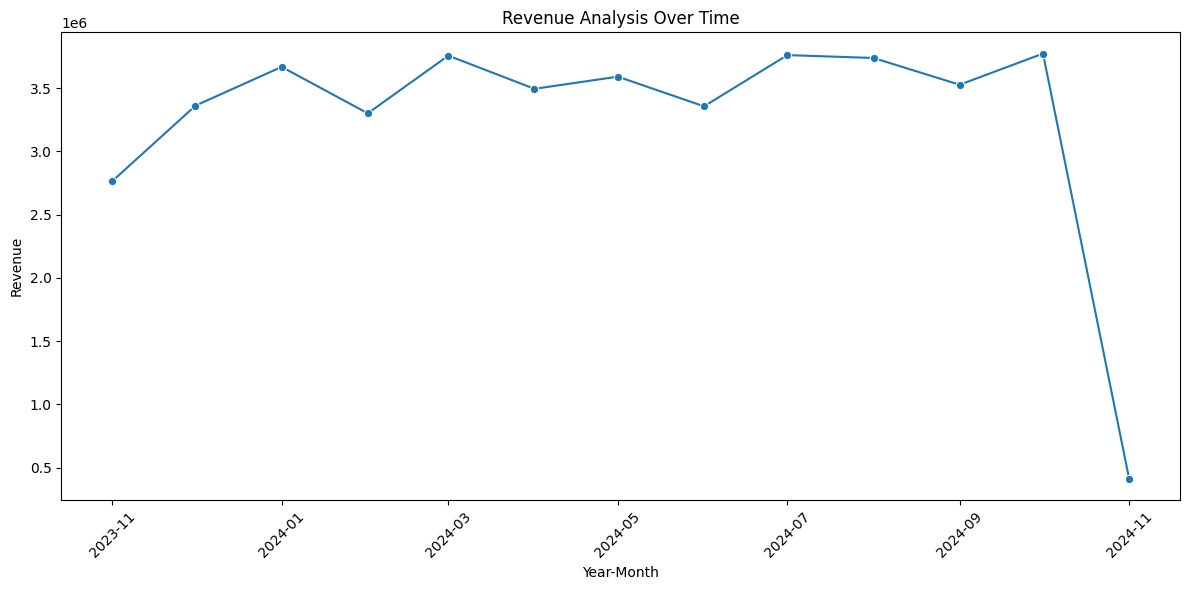

In [ ]:
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
orders_df['year_month'] = orders_df['order_date'].dt.to_period('M')

revenue_by_month = orders_df.groupby('year_month')['total_price'].sum().reset_index()
revenue_by_month.rename(columns={'total_price': 'revenue'}, inplace=True)
revenue_by_month['year_month'] = revenue_by_month['year_month'].dt.to_timestamp()
print(revenue_by_month)

plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='revenue', data=revenue_by_month, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.title('Revenue Analysis Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# clustering customers RFM

In [ ]:
from datetime import datetime
merged_df = pd.merge(customers_df, orders_df, on='customer_id', how='left')

# convering date to datetime
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

# calculating most recent purchase date
merged_df['last_purchase_date'] = merged_df.groupby('customer_id')['order_date'].transform('max')

# calculating days since last purchase
today = datetime.now()
merged_df['days_since_last_purchase'] = (today - merged_df['last_purchase_date']).dt.days

# aggregating
clustered_df = merged_df.groupby('customer_id').agg(
    days_since_last_purchase=('days_since_last_purchase', 'first'),
    total_orders=('order_id', 'count'),
    total_payment=('total_price', 'sum')
).reset_index()

print(clustered_df)

      customer_id  days_since_last_purchase  total_orders  total_payment
0               1                       265             2        1096.70
1               2                       245             1        4378.05
2               3                       196             1        3177.20
3               4                       234             1         670.56
4               5                       182             2        9667.22
...           ...                       ...           ...            ...
9995         9996                       150             2        7192.66
9996         9997                       402             2        3193.38
9997         9998                       152             1        2755.02
9998         9999                        94             2        2174.36
9999        10000                       426             1        1309.30

[10000 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(clustered_df[['days_since_last_purchase', 'total_orders', 'total_payment']])
print(scaled_data)

[[0.50958904 1.         0.05462442]
 [0.45479452 0.         0.22180891]
 [0.32054795 0.         0.16062571]
 ...
 [0.2        0.         0.13911567]
 [0.04109589 1.         0.1095311 ]
 [0.95068493 0.         0.06545637]]


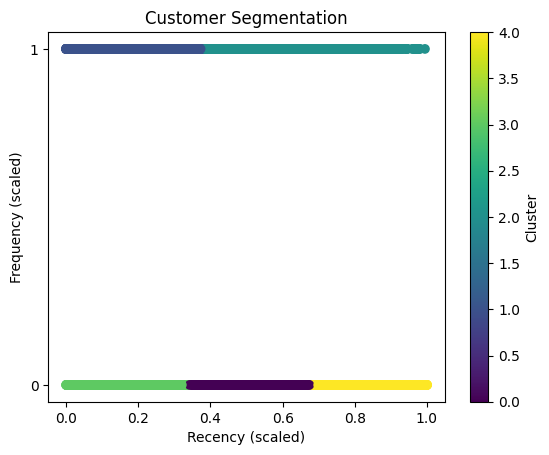

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clustered_df['cluster'] = kmeans.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clustered_df['cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.yticks(np.arange(0, 1.1))
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
clustered_df.to_csv('clustered_df.csv', index=False)
from google.colab import files
files.download('clustered_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediction model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
orders = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/orders.csv')
order_items = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/order_items.csv')
products = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/products.csv')
payments = pd.read_csv('/content/drive/MyDrive/🛒 Online Shop 2024 dataset/payment.csv')

merged_data = (
    orders
    .merge(order_items, on="order_id", how="left")
    .merge(products, on="product_id", how="left")
    .merge(payments, on = 'order_id', how="left")
)
print(merged_data.head())

   order_id  order_date  customer_id  total_price  order_item_id  product_id  \
0      7324  2023-11-27         2160       955.86              2        1695   
1      8938  2024-08-31         8497       984.91              4        1958   
2      4238  2023-12-05         6295       649.18              5        1880   
3     10944  2024-02-22         2936        54.83              7           1   
4     11075  2024-08-14         2994       320.24              8         827   

   quantity  price_at_purchase     product_name        category   price  \
0         1             955.86        Desk Lamp  Home & Kitchen  940.82   
1         1             984.91     External SSD     Electronics  180.06   
2         1             649.18  Kitchen Blender  Home & Kitchen  856.78   
3         1              54.83     Office Chair       Furniture  445.01   
4         1             320.24      Smart Watch     Electronics  764.34   

   supplier_id  payment_id payment_method  amount transaction_status

In [ ]:
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])
merged_data['year'] = merged_data['order_date'].dt.year
merged_data['month'] = merged_data['order_date'].dt.month
merged_data['day_of_week'] = merged_data['order_date'].dt.dayofweek

merged_data['item_total_price'] = merged_data['quantity'] * merged_data['price_at_purchase']
merged_data['order_size'] = merged_data.groupby('order_id')['quantity'].transform('sum')

print(merged_data.head())

   order_id order_date  customer_id  total_price  order_item_id  product_id  \
0      7324 2023-11-27         2160       955.86              2        1695   
1      8938 2024-08-31         8497       984.91              4        1958   
2      4238 2023-12-05         6295       649.18              5        1880   
3     10944 2024-02-22         2936        54.83              7           1   
4     11075 2024-08-14         2994       320.24              8         827   

   quantity  price_at_purchase     product_name        category  ...  \
0         1             955.86        Desk Lamp  Home & Kitchen  ...   
1         1             984.91     External SSD     Electronics  ...   
2         1             649.18  Kitchen Blender  Home & Kitchen  ...   
3         1              54.83     Office Chair       Furniture  ...   
4         1             320.24      Smart Watch     Electronics  ...   

   supplier_id  payment_id  payment_method  amount  transaction_status  year  \
0          5

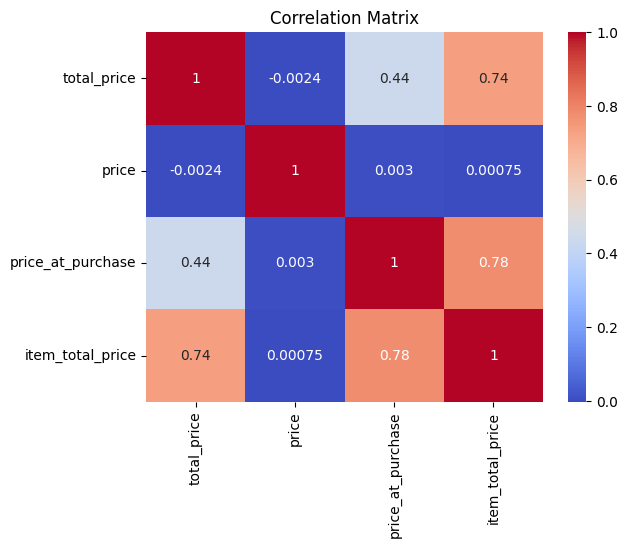

In [ ]:
corr_matrix = merged_data[['total_price', 'price', 'price_at_purchase', 'item_total_price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
merged_data = merged_data.drop(columns=['payment_id','order_item_id', 'customer_id', 'price', 'supplier_id', 'amount', 'price_at_purchase','product_name'])

In [ ]:
categorical_cols = ['category', 'payment_method', 'transaction_status']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(encoder.fit_transform(merged_data[categorical_cols]))

encoded_cats.columns = encoder.get_feature_names_out(categorical_cols)
merged_data = pd.concat([merged_data, encoded_cats], axis=1)

merged_data = merged_data.drop(columns=categorical_cols)

In [ ]:
print(merged_data.columns)

Index(['order_id', 'order_date', 'total_price', 'product_id', 'quantity',
       'year', 'month', 'day_of_week', 'item_total_price', 'order_size',
       'category_Electronics', 'category_Furniture', 'category_Home & Kitchen',
       'transaction_status_Failed', 'transaction_status_Pending'],
      dtype='object')


In [ ]:
X = merged_data.drop(['total_price', 'product_id', 'order_date'], axis=1)
y = merged_data['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MAE: 360.1048023999999
MSE: 836146.9118759698
R2 Score: 0.8371392940324984


In [ ]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))

                       Feature  Importance
5             item_total_price    0.786381
6                   order_size    0.113894
0                     order_id    0.045414
3                        month    0.020371
4                  day_of_week    0.016169
7         category_Electronics    0.004562
9      category_Home & Kitchen    0.004232
8           category_Furniture    0.003120
1                     quantity    0.002046
11  transaction_status_Pending    0.001659
2                         year    0.001583
10   transaction_status_Failed    0.000569


retraining model for seasonal trends

In [ ]:
merged_data['order_month'] = merged_data['order_date'].dt.month
merged_data['order_week_of_year'] = merged_data['order_date'].dt.isocalendar().week
merged_data['order_day_of_week'] = merged_data['order_date'].dt.dayofweek
merged_data['is_holiday_season'] = merged_data['order_month'].apply(lambda x: 1 if x in [11, 12] else 0)

grouped_by_month = merged_data.groupby('order_month')['total_price'].mean().reset_index()

print(merged_data.head())

   order_id order_date  total_price  product_id  quantity  year  month  \
0      7324 2023-11-27       955.86        1695         1  2023     11   
1      8938 2024-08-31       984.91        1958         1  2024      8   
2      4238 2023-12-05       649.18        1880         1  2023     12   
3     10944 2024-02-22        54.83           1         1  2024      2   
4     11075 2024-08-14       320.24         827         1  2024      8   

   day_of_week  item_total_price  order_size  category_Electronics  \
0            0            955.86           1                   0.0   
1            5            984.91           1                   1.0   
2            1            649.18           1                   0.0   
3            3             54.83           1                   0.0   
4            2            320.24           1                   1.0   

   category_Furniture  category_Home & Kitchen  transaction_status_Failed  \
0                 0.0                      1.0           

In [ ]:
X = merged_data.drop(['total_price', 'product_id', 'order_date'], axis=1)
y = merged_data['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MAE: 357.03805087499995
MSE: 821462.8542726889
R2 Score: 0.8399993847100713


In [ ]:
import joblib

joblib.dump(model, 'sales_prediction_model.pkl')
loaded_model = joblib.load('sales_prediction_model.pkl')

In [ ]:
# simulated future data
future_data = pd.DataFrame({
    'order_id': [1, 1, 2, 11],
    'order_month': [1, 2, 11, 12],
    'order_week_of_year': [1, 6, 46, 50],
    'order_day_of_week': [0, 2, 5, 6],
    'is_holiday_season': [0, 0, 1, 1],
    'quantity': [3, 5, 8, 10],
    'order_size': [3, 5, 8, 10],
    'amount': [150, 200, 300, 450],
    'year': [2024, 2024, 2024, 2024],
    'month': [1, 2, 11, 12],
    'day_of_week': [0, 2, 5, 6],
    'item_total_price': [955.86, 456.32, 831.21, 250.24],
    'category_Electronics': [0, 0, 1, 0],
    'category_Furniture': [0, 0, 0, 1],
    'category_Home & Kitchen': [1, 0, 0, 0],
    'transaction_status_Failed': [0, 0, 0, 0],
    'transaction_status_Pending': [0, 0, 0, 0]
})

future_data = future_data[X.columns]

#print("Columns used during fit:", X.columns.tolist())
#print("Columns in future_data:", future_data.columns.tolist())

scaled_future_data = scaler.transform(future_data)
predictions = loaded_model.predict(scaled_future_data)

future_data['predicted_sales'] = predictions

print(future_data)

   order_id  quantity  year  month  day_of_week  item_total_price  order_size  \
0         1         3  2024      1            0            955.86           3   
1         1         5  2024      2            2            456.32           5   
2         2         8  2024     11            5            831.21           8   
3        11        10  2024     12            6            250.24          10   

   category_Electronics  category_Furniture  category_Home & Kitchen  \
0                     0                   0                        1   
1                     0                   0                        0   
2                     1                   0                        0   
3                     0                   1                        0   

   transaction_status_Failed  transaction_status_Pending  order_month  \
0                          0                           0            1   
1                          0                           0            2   
2             